In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modules made for assignment
from modules import LoadData
from modules import ShowImage
from modules import label_split
from modules import kNearestClassifier
from modules import evaluation_kNearest
from modules import BinaryRespons
from modules import ValidationSplit
from modules import DevelopData
from modules import OptimalK

%matplotlib inline

# Loading Data

In [2]:
#LoadData.MNIST() #Data is cleaned to proper format

In [3]:
df_train_raw = pd.read_csv('MNIST_df_train.csv')
df_test_raw = pd.read_csv('MNIST_df_test.csv')

In [4]:
#ShowImage(df_train, 2)

In [5]:
#ShowImage(df_test, 3)

# 0/1 classification

In [6]:
v1, v2 = 0, 1
df_train = BinaryRespons(df_train_raw,v1,v2)
df_test = BinaryRespons(df_test_raw,v1,v2)

In [7]:
# For developing

#df_train = DevelopData(df_train,100)
#df_test = DevelopData(df_test,20)

In [8]:
df_train.labs = df_train.labs.astype('int64')
df_test.labs = df_test.labs.astype('int64')

df_train, df_validation = ValidationSplit(df_train, 0.8)

x, y = label_split(df_train)

/Users/Jeppe/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
k_list = [i*2 + 1 for i in range(17)]
pred_list_val = []

for k in k_list:
    df_validation['prediction'] = df_validation.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_validation.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_val.append(evaluation_kNearest(df_validation))

In [10]:
pred_list_test = []

for k in k_list:
    df_test['prediction'] = df_test.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_test.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_test.append(evaluation_kNearest(df_test))

/Users/Jeppe/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
k_optimal_val, error_k_optimal_val = OptimalK(k_list, pred_list_val)
k_optimal_test, error_k_optimal_test = OptimalK(k_list, pred_list_test)

In [12]:
f, (ax1) = plt.subplots(1, 1)

ax1.plot(k_list, pred_list_val,label='error validation')
ax1.plot(k_list, pred_list_test,label='error test')

ax1.set_xlabel('K')
ax1.set_ylabel('error')

ax1.set_title('Plot of validation and test error classification of {}/{}'.format(v1, v2))

ax1.legend()
plt.savefig('figs/classification{}{}.png'.format(v1, v2))

In [13]:
print('optimal K - validation: ', k_optimal_val, 'error of optimal K - validation: ',error_k_optimal_val)
print('optimal K - test: ', k_optimal_test, 'error of optimal K - test: ',error_k_optimal_test)

optimal K - validation:  31 error of optimal K - validation:  0.0
optimal K - test:  33 error of optimal K - test:  0.0


# 0/8 classification

In [14]:
v1, v2 = 0, 8
df_train = BinaryRespons(df_train_raw,v1,v2)
df_test = BinaryRespons(df_test_raw,v1,v2)

In [15]:
# For developing

#df_train = DevelopData(df_train,100)
#df_test = DevelopData(df_test,20)

In [16]:
df_train.labs = df_train.labs.astype('int64')
df_test.labs = df_test.labs.astype('int64')

df_train, df_validation = ValidationSplit(df_train, 0.8)

x, y = label_split(df_train)

/Users/Jeppe/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
k_list = [i*2 + 1 for i in range(17)]
pred_list_val = []

for k in k_list:
    df_validation['prediction'] = df_validation.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_validation.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_val.append(evaluation_kNearest(df_validation))

In [18]:
pred_list_test = []

for k in k_list:
    df_test['prediction'] = df_test.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_test.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_test.append(evaluation_kNearest(df_test))

/Users/Jeppe/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
k_optimal_val, error_k_optimal_val = OptimalK(k_list, pred_list_val)
k_optimal_test, error_k_optimal_test = OptimalK(k_list, pred_list_test)

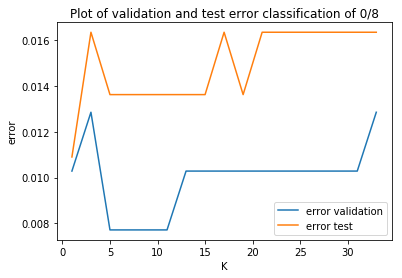

In [20]:
f, (ax1) = plt.subplots(1, 1)

ax1.plot(k_list, pred_list_val,label='error validation')
ax1.plot(k_list, pred_list_test,label='error test')
ax1.set_xlabel('K')
ax1.set_ylabel('error')

ax1.set_title('Plot of validation and test error classification of {}/{}'.format(v1, v2))

ax1.legend()
plt.savefig('figs/classification{}{}.png'.format(v1, v2))

In [21]:
print('optimal K - validation: ', k_optimal_val, 'error of optimal K - validation: ',error_k_optimal_val)
print('optimal K - test: ', k_optimal_test, 'error of optimal K - test: ',error_k_optimal_test)

optimal K - validation:  11 error of optimal K - validation:  0.007712082262210797
optimal K - test:  1 error of optimal K - test:  0.010899182561307902


# 5/6 classification

In [22]:
v1, v2 = 5, 6
df_train = BinaryRespons(df_train_raw,v1,v2)
df_test = BinaryRespons(df_test_raw,v1,v2)

In [23]:
# For developing

#df_train = DevelopData(df_train,100)
#df_test = DevelopData(df_test,20)

In [24]:
df_train.labs = df_train.labs.astype('int64')
df_test.labs = df_test.labs.astype('int64')

df_train, df_validation = ValidationSplit(df_train, 0.8)

x, y = label_split(df_train)

/Users/Jeppe/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
k_list = [i*2 + 1 for i in range(17)]
pred_list_val = []

for k in k_list:
    df_validation['prediction'] = df_validation.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_validation.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_val.append(evaluation_kNearest(df_validation))

In [26]:
pred_list_test = []

for k in k_list:
    df_test['prediction'] = df_test.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_test.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list_test.append(evaluation_kNearest(df_test))

/Users/Jeppe/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
k_optimal_val, error_k_optimal_val = OptimalK(k_list, pred_list_val)
k_optimal_test, error_k_optimal_test = OptimalK(k_list, pred_list_test)

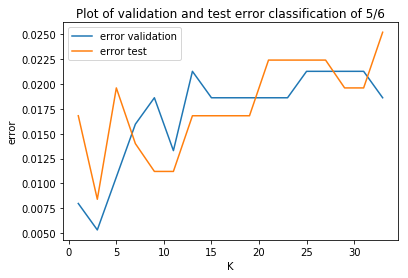

In [28]:
f, (ax1) = plt.subplots(1, 1)

ax1.plot(k_list, pred_list_val,label='error validation')
ax1.plot(k_list, pred_list_test,label='error test')

ax1.set_xlabel('K')
ax1.set_ylabel('error')

ax1.set_title('Plot of validation and test error classification of {}/{}'.format(v1, v2))

ax1.legend()
plt.savefig('figs/classification{}{}.png'.format(v1, v2))

In [29]:
print('optimal K - validation: ', k_optimal_val, 'error of optimal K - validation: ',error_k_optimal_val)
print('optimal K - test: ', k_optimal_test, 'error of optimal K - test: ',error_k_optimal_test)

optimal K - validation:  3 error of optimal K - validation:  0.005319148936170213
optimal K - test:  3 error of optimal K - test:  0.008403361344537815


# Linear Regression



In [2]:
danwood = LoadData.DanWood()
danwood['ones'] = 1 # adding vector for constant
danwood.head()

x      y  ones
0  1.309  2.138     1
1  1.471  3.421     1
2  1.490  3.597     1
3  1.565  4.340     1
4  1.611  4.882     1

In [17]:
x = np.array(danwood.drop('y', axis=1))
y = np.array(danwood['y'])
print(x.shape, y.shape)

(6, 2) (6,)


In [4]:
xx = np.dot(x.T,x)
xy = np.dot(x.T,y)
xx_inv = np.linalg.inv(xx)

ols = np.dot(xx_inv,xy)

In [5]:
linsp_length = abs((min(danwood.x) - max(danwood.x)))*0.1

linsp = np.linspace(min(danwood.x)-linsp_length,max(danwood.x)+linsp_length)
y_hat = ols[-1] + linsp*ols[0]

In [6]:
f, (ax1) = plt.subplots(1,1)

ax1.plot(linsp,y_hat, label = 'ols regression')
ax1.scatter(danwood.x,danwood.y, color='red', label = 'empirical observations')
ax1.set_xlabel('Absolute temperature (x)')
ax1.set_ylabel('radiated energy (y)')
ax1.set_title('OLS regression of Danwood \n intercept: {}, beta: {}'.format(ols[-1],ols[0]))
ax1.legend()


plt.savefig('figs/OLS.png')

In [29]:
var_y = np.var(y)
mse_x =  np.mean((np.array(y) - np.array([pred*9.489 - 10.426 for pred in danwood['x']]))**2)

print('variance of y', var_y,'\n MSE of x', mse_x)

variance of y 1.26892955556 
 MSE of x 0.012434413088
